In [ ]:
# Car Prices Analysis 🚗💰

### Assignment for Data Analysis with Pandas

**Name:** Nikitta  
**Date:** 2025-08-21  

This notebook performs data ingestion, quality profiling, querying, and visualization on the `car_prices.csv` dataset.


In [ ]:
## Task 1: Data Ingestion & Quality Profiling
In this section, we:
- Load the dataset
- Inspect records and structure
- Handle missing values & duplicates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots prettier
sns.set(style="whitegrid")

In [2]:
# Load dataset
df = pd.read_csv("car_prices.csv")

# Show first 5 rows
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
print("Data types:\n", df.dtypes)
print("\nRecord count:", len(df))

Data types:
 year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

Record count: 219355


In [4]:
print("Shape (rows, columns):", df.shape)
print("\nColumn names and data types:\n")
print(df.dtypes)

Shape (rows, columns): (219355, 16)

Column names and data types:

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object


Null values per column:
 year                0
make             2796
model            2837
trim             3125
body             5669
transmission    25558
vin                 0
state               0
condition       11793
odometer           78
color             332
interior          332
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


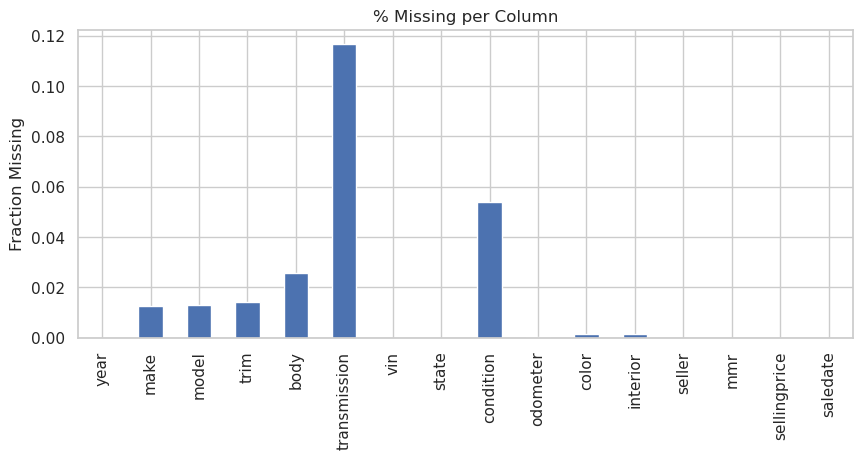

In [5]:
print("Null values per column:\n", df.isna().sum())

plt.figure(figsize=(10,4))
df.isna().mean().plot(kind="bar", title="% Missing per Column")
plt.ylabel("Fraction Missing")
plt.show()

In [6]:
# Fill numeric columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Drop duplicate rows
df = df.drop_duplicates()

print("After cleaning, dataset shape:", df.shape)

After cleaning, dataset shape: (219355, 16)


In [ ]:
## Task 2: DataFrame Queries
We answer common business questions like average price, most frequent models, and state-wise analysis.


In [7]:
print("Average price:", df['sellingprice'].mean())
print("Min price:", df['sellingprice'].min())
print("Max price:", df['sellingprice'].max())

Average price: 12909.230220418956
Min price: 1
Max price: 169500


In [8]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [9]:
print("Unique brands:", df['make'].nunique())
print("Unique models:", df['model'].nunique())

Unique brands: 94
Unique models: 924


In [10]:
df[df['sellingprice'] > 165000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)


In [11]:
df['model'].value_counts().head(5)

model
Altima    10644
F-150      5308
Camry      4696
Fusion     4533
Escape     4379
Name: count, dtype: int64

In [12]:
df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)

make
Rolls-Royce    157060.000000
Ferrari        137750.000000
Tesla           80750.000000
airstream       71000.000000
Bentley         66682.653061
                   ...      
Geo               600.000000
dodge tk          550.000000
dot               500.000000
ford truck        483.333333
Daewoo            300.000000
Name: sellingprice, Length: 94, dtype: float64

In [13]:
df.groupby('interior')['sellingprice'].min()

interior
beige         100
black           1
blue          200
brown         250
burgundy      325
gold          250
gray            1
green         300
off-white     900
orange       1200
purple        200
red           200
silver        250
tan           100
white         350
yellow       3700
—             175
Name: sellingprice, dtype: int64

In [14]:
df.groupby('year')['odometer'].max().sort_values(ascending=False)

year
2008    999999.0
2004    999999.0
2009    999999.0
2007    999999.0
2006    999999.0
2012    999999.0
2010    999999.0
2013    999999.0
2014    999999.0
2003    999999.0
2005    999999.0
2001    999999.0
2002    470368.0
2000    439031.0
2011    436372.0
1997    423691.0
1995    396793.0
1992    379307.0
1993    378670.0
1999    374598.0
1996    366622.0
1998    351917.0
1994    347605.0
1991    274149.0
1990    249117.0
1988    241751.0
1989    218052.0
1987    195154.0
1986    189591.0
1984    170799.0
1985     95965.0
1982     85738.0
2015     44174.0
Name: odometer, dtype: float64

In [15]:
df['car_age'] = 2025 - df['year']
df[['year', 'car_age']].head()


,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11


In [16]:
df[(df['condition'] >= 48) & (df['odometer'] > 90000)].shape[0]

304

In [17]:
df[df['year'] > 2013].groupby('state')['sellingprice'].mean().sort_values(ascending=False)


state
ms    31700.000000
oh    28956.851518
ab    25708.461538
nj    24760.837406
on    22712.880711
qc    22376.551724
tn    22079.260031
ne    21600.422222
pa    20727.673749
ny    20675.000000
ca    20342.150401
mi    20057.817014
wi    20052.678505
tx    20032.271809
ma    19974.285714
wa    19875.920000
co    19803.906250
nv    19799.093781
il    19674.039062
mn    19565.956376
mo    19334.800667
fl    19171.785577
ga    19161.741557
va    19127.692308
az    18884.615385
md    17859.221311
ut    17500.000000
nc    17174.265092
sc    16915.624606
la    16430.255814
hi    16296.875000
pr    16237.168142
or    16118.269231
in    15837.575758
Name: sellingprice, dtype: float64

In [18]:
threshold = df['condition'].quantile(0.8)
df[df['condition'] >= threshold].groupby('make')['sellingprice'].mean().sort_values().head(10)


make
Isuzu         1900.000000
Oldsmobile    3050.000000
honda         4233.333333
Saturn        5700.847458
chrysler      6033.333333
subaru        6200.000000
gmc truck     6400.000000
Pontiac       6652.631579
smart         7609.615385
cadillac      7840.000000
Name: sellingprice, dtype: float64

In [ ]:
## Task 3: Data Visualization & Insights
We create visualizations for correlation, yearly trends, odometer trends, state-wise sales, and condition bins.


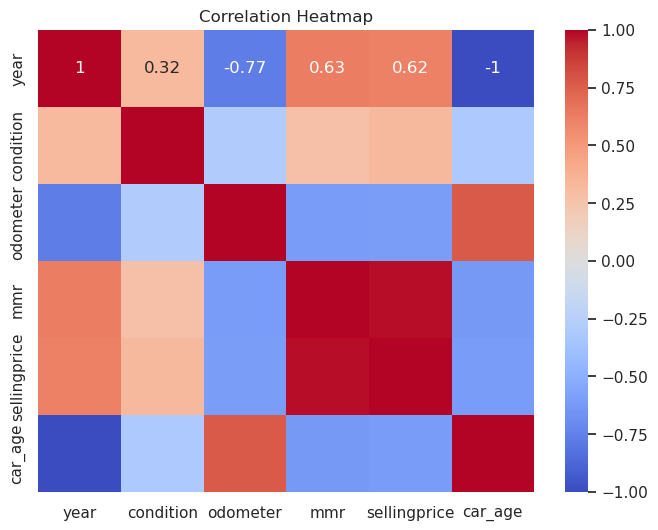

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

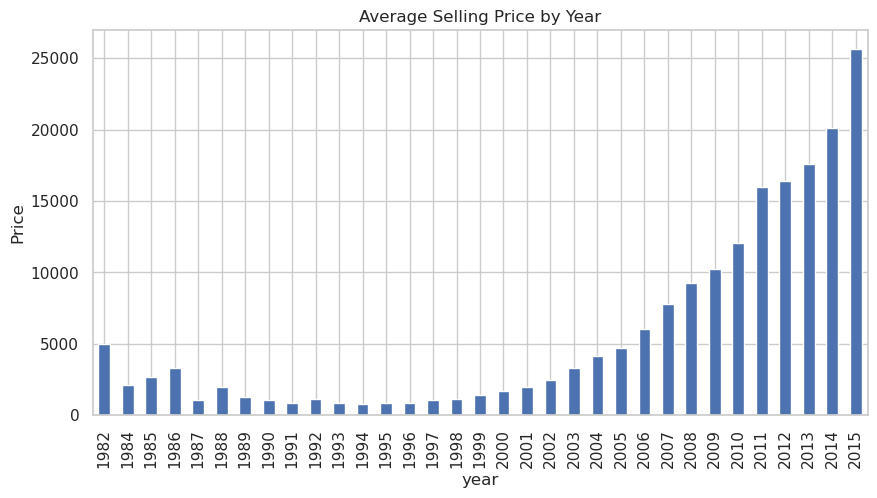

In [20]:
avg_by_year = df.groupby('year')['sellingprice'].mean()

plt.figure(figsize=(10,5))
avg_by_year.plot(kind='bar')
plt.title("Average Selling Price by Year")
plt.ylabel("Price")
plt.show()

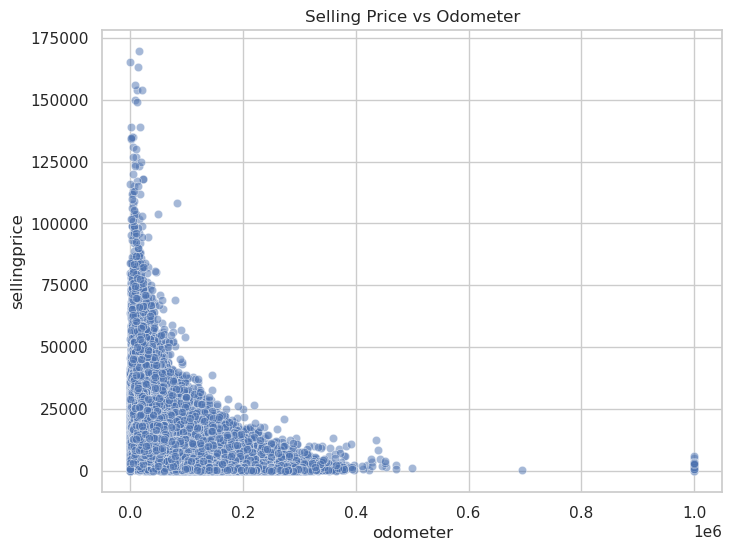

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.5)
plt.title("Selling Price vs Odometer")
plt.show()

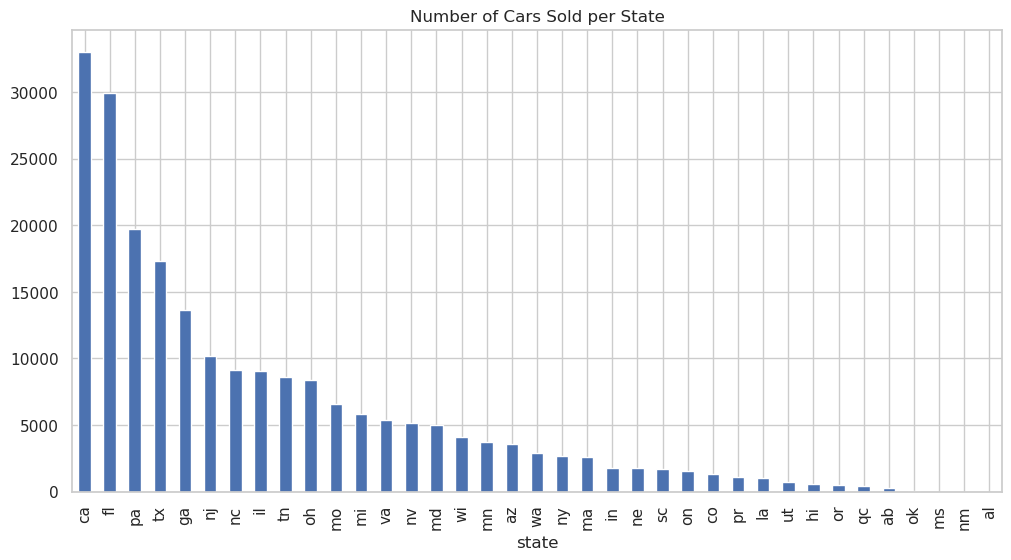

Top 3 states: state
ca    33033
fl    29894
pa    19739
Name: count, dtype: int64


In [22]:
state_counts = df['state'].value_counts()

plt.figure(figsize=(12,6))
state_counts.plot(kind='bar')
plt.title("Number of Cars Sold per State")
plt.show()

print("Top 3 states:", state_counts.head(3))

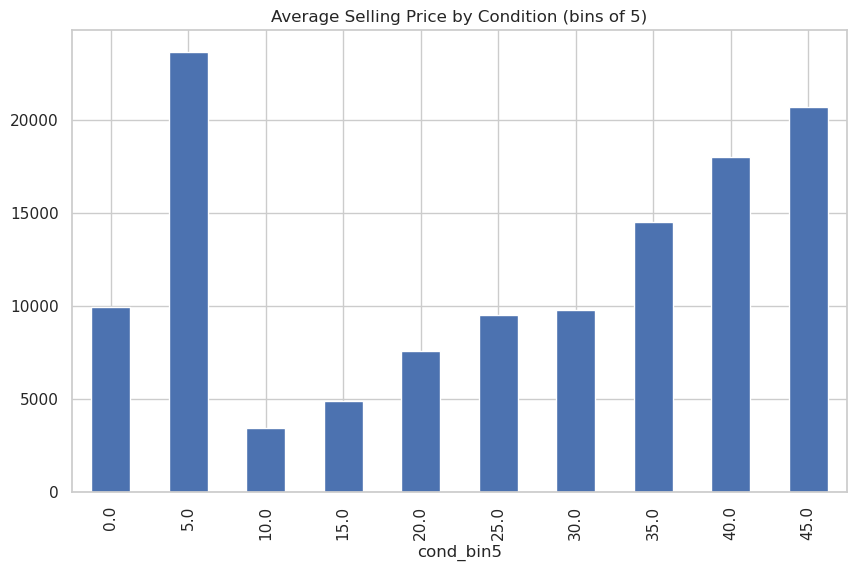

In [23]:
df['cond_bin5'] = (df['condition'] // 5) * 5

plt.figure(figsize=(10,6))
df.groupby('cond_bin5')['sellingprice'].mean().plot(kind='bar')
plt.title("Average Selling Price by Condition (bins of 5)")
plt.show()

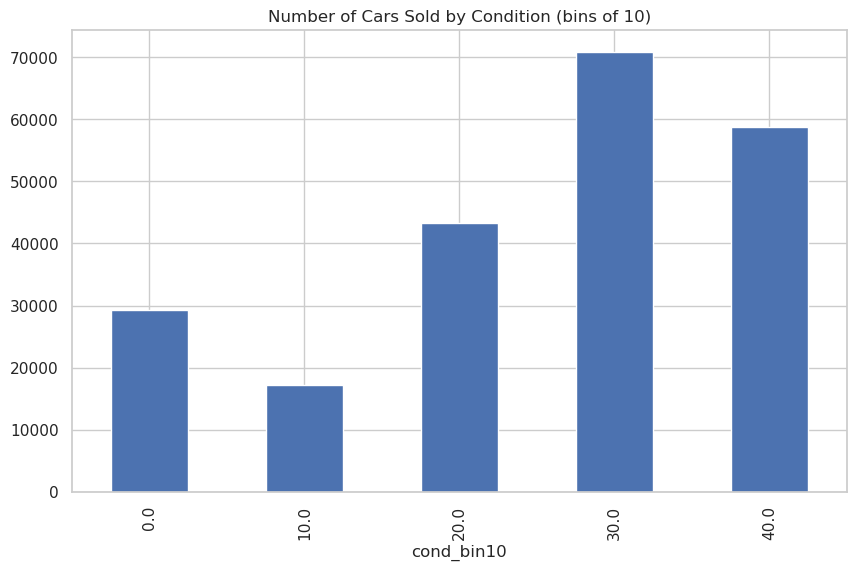

In [24]:
df['cond_bin10'] = (df['condition'] // 10) * 10

plt.figure(figsize=(10,6))
df['cond_bin10'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Cars Sold by Condition (bins of 10)")
plt.show()

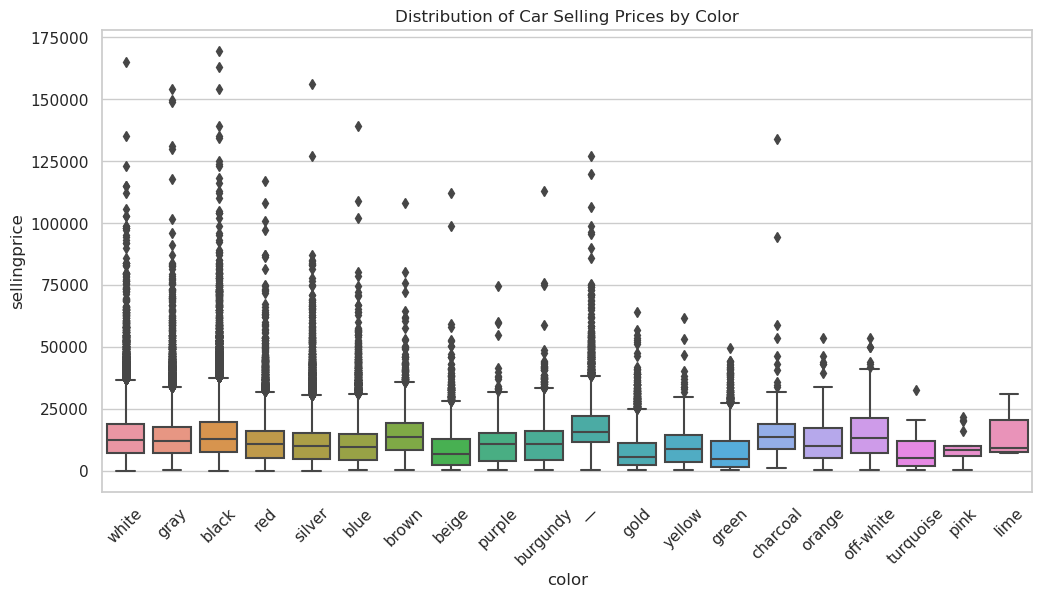

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='color', y='sellingprice', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Car Selling Prices by Color")
plt.show()

In [ ]:
# ✅ Conclusion
This analysis highlighted:
- Average, min, max car prices
- Most frequent models and brands
- Strong relationship between odometer and price
- State-wise car sales trends
- Distribution of prices across conditions and colors

The project demonstrates proficiency in Pandas, data cleaning, querying, and visualization.